<a href="https://colab.research.google.com/github/chennurishirisha/deep_learning/blob/main/churan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 438 kB 59.4 MB/s 
     |████████████████████████████████| 1.7 MB 54.8 MB/s 
     |████████████████████████████████| 5.9 MB 55.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [5]:
##import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
## divide the dataset into independent and dependent features
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]


In [9]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
## Feature Engineering
geography = pd.get_dummies(x['Geography'],drop_first = True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
gender = pd.get_dummies(x['Gender'],drop_first = True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
## concatenate these variables with dataframe
x = x.drop(['Gender','Geography'],axis = 1)

In [14]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
x = pd.concat([x,gender,geography],axis = 1)

In [16]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
##splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =0.20,random_state = 0 )

In [18]:
##feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)

In [19]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [20]:
x_train.shape

(8000, 11)

In [21]:
### part 2 now lets create ANN
!pip install keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
### initialize the ANN
Classifier = Sequential()

In [23]:
## Adding the input Layer
Classifier.add(Dense(units = 11,activation ='relu'))

In [24]:
##adding the first hidden layer
Classifier.add(Dense(units = 7,activation ='relu'))
Classifier.add(Dropout(0.2))

In [25]:
##adding second hidden layer
Classifier.add(Dense(units = 6,activation ='relu'))

In [26]:
## adding the output layer
#Classifier.add(Dense(units = 6,activation ='relu'))
Classifier.add(Dense(1,activation = 'sigmoid'))

In [27]:
Classifier.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [28]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)


model_history = Classifier.fit(x_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000)

In [29]:
#early stopping keras
import tensorflow as tf

early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

model_history = Classifier.fit(x_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000)

model_history.history.keys()

In [32]:
model_history = Classifier.fit(x_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000,callbacks =early_stoping)


Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3297 - accuracy: 0.8642 - val_loss: 0.3817 - val_accuracy: 0.8493
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3284 - accuracy: 0.8642 - val_loss: 0.3642 - val_accuracy: 0.8591
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3298 - accuracy: 0.8623 - val_loss: 0.3734 - val_accuracy: 0.8561
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3281 - accuracy: 0.8634 - val_loss: 0.3715 - val_accuracy: 0.8569
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3291 - accuracy: 0.8666 - val_loss: 0.3638 - val_accuracy: 0.8595
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.8647 - val_loss: 0.3607 - val_accuracy: 0.8588
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy:

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

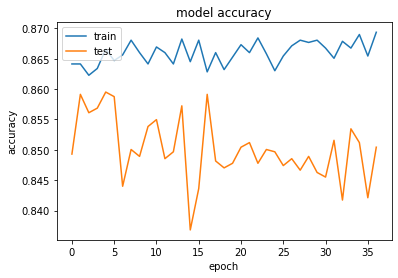

In [34]:
## SUMMARIZE HISTORY FOR ACCURACY
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

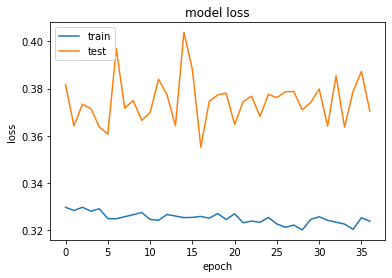

In [35]:
## SUMMARIZE HISTORY FOR ACCURACY
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [36]:
## part 3 making the predictions and evaluating the model
##predicting the test set results
y_pred = Classifier.predict(x_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 1ms/step


In [38]:
## make confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1454,  141],
       [ 152,  253]])

In [39]:
### caluclate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score


0.8535

In [40]:
### get the weights
Classifier.get_weights()

[array([[ 0.23541348, -0.06549058,  0.16673434,  0.03861046,  0.0608912 ,
         -0.17401624,  0.03869269,  0.12563956,  0.01284389, -0.09292742,
          0.01930844],
        [ 0.32017717, -0.701903  ,  0.30371732, -0.35491857, -0.27224436,
         -0.8813045 ,  1.2098924 ,  0.32962996,  0.2699507 ,  0.8763789 ,
          0.10521942],
        [-0.07181362,  0.13180362,  0.26446626,  0.09786927, -0.30669743,
         -0.15758719, -0.04577801, -0.17039952,  0.01799235,  0.03606807,
          0.03910361],
        [ 0.48412576,  0.2264723 , -0.477499  , -1.2391844 , -0.3829594 ,
         -0.21514377,  0.21344383, -0.12721208,  0.00854822, -0.17183413,
         -1.0345482 ],
        [-0.0498688 ,  0.06188267, -0.16553654,  0.05760708,  0.00913903,
          0.27167994, -0.4772259 , -0.04246452,  1.1030868 ,  0.37210137,
         -1.1391962 ],
        [-0.2822115 ,  0.07935682, -0.11383968,  0.00810947,  0.30234584,
         -0.36127013, -0.11855536,  0.30363163, -0.01828821, -0.1305511